In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import torch 
from models.PACE import PACE
import config
from utils.utils import load_net_state

ds = 'Bacteria'
n_classes = 30 
device = 'cuda:0'

params = {'net':config.NET, 'strategy':config.STRATEGY['train']}
pace = PACE(n_classes=n_classes, **params['net']).to(device)
pace = load_net_state(pace, torch.load('./checkpoints/Bacteria/PACE/873.pth'))


In [3]:
test_x = np.load(f'datasets/{ds}/test_x.npy')
test_y = np.load(f'datasets/{ds}/test_y.npy')

### check the accuracy of the two models

In [4]:
from utils.utils import test_model
pace_outputs, pace_pred, true = test_model(pace, ds, device=device)

test loss: 0.45388 accuracy:0.87233: 100%|██████████| 24/24 [00:49<00:00,  2.08s/it]

              precision    recall  f1-score   support

           0     1.0000    0.9700    0.9848       100
           1     0.9709    1.0000    0.9852       100
           2     0.8041    0.7800    0.7919       100
           3     0.9434    1.0000    0.9709       100
           4     0.6727    0.3700    0.4774       100
           5     0.9434    1.0000    0.9709       100
           6     1.0000    0.4100    0.5816       100
           7     0.6304    0.8700    0.7311       100
           8     0.8659    0.7100    0.7802       100
           9     0.6637    0.7500    0.7042       100
          10     0.9479    0.9100    0.9286       100
          11     0.5577    0.5800    0.5686       100
          12     0.8909    0.9800    0.9333       100
          13     0.9592    0.9400    0.9495       100
          14     0.9346    1.0000    0.9662       100
          15     0.8586    0.8500    0.8543       100
          16     0.7961    0.8200    0.8079       100
          17     0.9620    

### plot confusion matrix

Text(0.5, 1.0, 'Confusion Matrix of PACE')

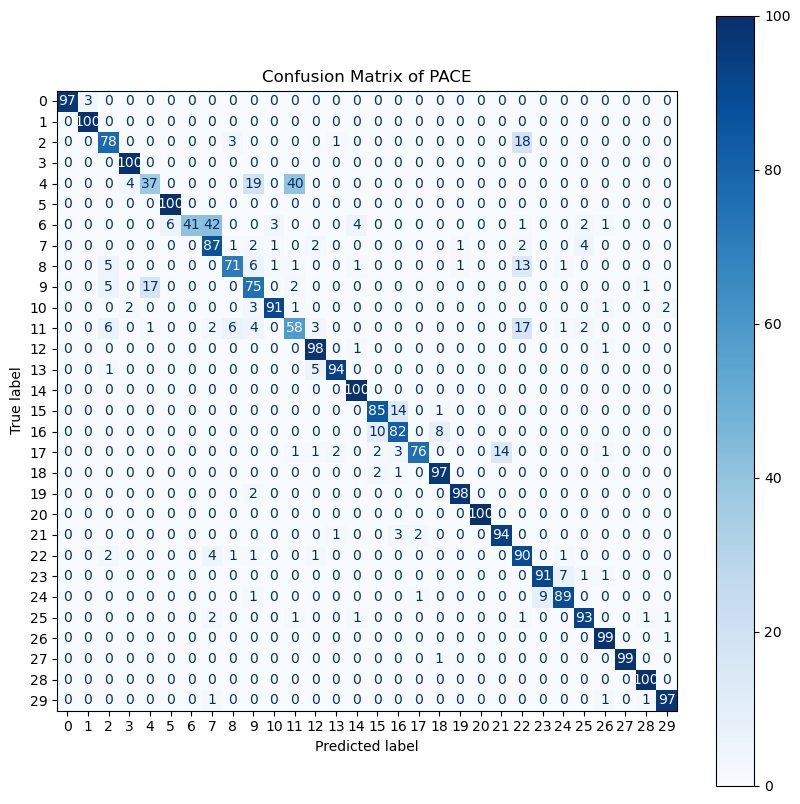

In [6]:
# plot cofusion matrix of pace and resnet

fig, ax = plt.subplots(1,1, figsize=(10,10))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true, pace_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(30))
disp.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix of PACE')
